In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
ctMatrix = pd.read_csv("../../Data/FirstCountMatrix.csv", sep = ",",
                        index_col= 0)

print(f'Shape of raw matrix: {ctMatrix.shape}')

# Cleaning the matrix of rows with all zeros
ctMatrix_clean = ctMatrix[(ctMatrix == 0).sum(axis =1) != ctMatrix.shape[1]]

print(f"Shape of matrix without rows that have all zeros {ctMatrix_clean.shape}")


Shape of raw matrix: (40605, 656)
Shape of matrix without rows that have all zeros (29141, 656)


In [3]:
(ctMatrix_clean == 0).sum().describe()

count      656.000000
mean     22139.722561
std        975.498757
min      20258.000000
25%      21410.000000
50%      22049.500000
75%      22772.000000
max      24620.000000
dtype: float64

In [5]:
# getting rid of outliers

zeros_per_column = (ctMatrix_clean == 0).sum()

Q1 = zeros_per_column.quantile(0.25)
Q3 = zeros_per_column.quantile(0.75)

IQR = Q3 - Q1
# Selecting the range based on Tukey's method assumption

#lower_bounds = we want to remove only the cells that have a lot of zeros
upper_bounds = Q3 + (1.5 * IQR)

print(f'Q1 value: {Q1}')
print(f'Q3 value: {Q3}')
print(f'IQR value: {IQR}')
print(f'upper bounds value: {upper_bounds}')

ctMatrix_cleanTest = ctMatrix_clean.loc[:, (ctMatrix_clean == 0).sum() < upper_bounds]

# There are no columns that have zeros count outside of the upper bounds range

Q1 value: 21410.0
Q3 value: 22772.0
IQR value: 1362.0
upper bounds value: 24815.0


In [6]:
ctMatrix_cleanTest.shape

(29141, 656)

In [103]:
Q1

20258.0

In [8]:
(ctMatrix_clean == 0).sum(axis = 0).describe()

count    29141.000000
mean       498.392574
std        191.228655
min          0.000000
25%        381.000000
50%        597.000000
75%        651.000000
max        655.000000
dtype: float64

In [91]:
Q1

629485.932

In [69]:
# Removing rows and columns that have 90% zeros
row_threshold = 0.1 * ctMatrix.shape[0]
column_threshold = 0.9 * ctMatrix.shape[1]

print(f"Threshold for rows: {row_threshold}")
print(f"Threshold for column: {column_threshold}")


Threshold for rows: 4060.5
Threshold for column: 590.4


In [74]:
(ctMatrix == 0).sum().describe()

count      656.000000
mean     33603.722561
std        975.498757
min      31722.000000
25%      32874.000000
50%      33513.500000
75%      34236.000000
max      36084.000000
dtype: float64

In [75]:
(ctMatrix == 0).sum(axis = 1).describe()

count    40605.000000
mean       542.889841
std        176.853086
min          0.000000
25%        483.000000
50%        648.000000
75%        656.000000
max        656.000000
dtype: float64

In [76]:
ctMatrix.loc[(ctMatrix==0).sum(axis = 1) < row_threshold]

,073A01,073A02,073A03,073A04,073A06,073A08,073A10,073A12,073A18,073A19,...,090P13,090P15,090P16,090P17,090P18,090P19,090P20,090P21,090P22,090P23
TSPAN6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,6.078,3.000,...,1.008,0.0,0.000,1.001,1.000,0.000,0.000,0.000,1.000,0.000
TNMD,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
DPM1,3.093,7.505,3.000,23.000,34.000,1.000,3.703,70.007,42.804,3.097,...,292.645,0.0,18.159,9.170,103.000,15.793,1.900,188.000,7.972,1.000
SCYL3,1.000,0.000,0.000,0.000,12.000,1.001,6.018,0.000,0.000,0.000,...,1.003,0.0,0.000,1.003,0.000,0.000,2.082,2.003,4.007,3.992
C1orf112,0.000,0.000,0.000,2.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOD2,64.623,299.582,169.784,74.582,67.815,137.103,130.354,63.790,194.203,95.906,...,202.958,190.7,159.273,260.861,213.245,272.367,130.918,111.632,59.120,253.057
POLGARF,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
LY6S,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
TMEM276,0.000,0.000,0.000,0.000,74.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,2.474,0.000,0.000,0.000,207.000,353.000,178.491,0.000


In [85]:
ctMatrix_clean[(ctMatrix == 0).sum(axis =1) != ctMatrix.shape[1]]

,073A01,073A02,073A03,073A04,073A06,073A08,073A10,073A12,073A18,073A19,...,090P13,090P15,090P16,090P17,090P18,090P19,090P20,090P21,090P22,090P23
TSPAN6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,6.078,3.000,...,1.008,0.0,0.000,1.001,1.000,0.000,0.000,0.000,1.000,0.000
DPM1,3.093,7.505,3.000,23.000,34.000,1.000,3.703,70.007,42.804,3.097,...,292.645,0.0,18.159,9.170,103.000,15.793,1.900,188.000,7.972,1.000
SCYL3,1.000,0.000,0.000,0.000,12.000,1.001,6.018,0.000,0.000,0.000,...,1.003,0.0,0.000,1.003,0.000,0.000,2.082,2.003,4.007,3.992
C1orf112,0.000,0.000,0.000,2.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
FGR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRPL45P2,0.000,69.396,6.990,2.000,0.000,4.261,2.772,5.928,14.976,0.000,...,15.118,1.0,0.000,16.408,1.000,1.862,6.927,0.000,0.000,1.004
SOD2,64.623,299.582,169.784,74.582,67.815,137.103,130.354,63.790,194.203,95.906,...,202.958,190.7,159.273,260.861,213.245,272.367,130.918,111.632,59.120,253.057
POLGARF,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
TMEM276,0.000,0.000,0.000,0.000,74.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,2.474,0.000,0.000,0.000,207.000,353.000,178.491,0.000


In [81]:
(ctMatrix==0).sum(axis = 0)

073A01    32427
073A02    33014
073A03    32996
073A04    32758
073A06    32841
          ...  
090P19    34040
090P20    32413
090P21    33702
090P22    32880
090P23    33945
Length: 656, dtype: int64

In [80]:
(ctMatrix == 0).sum(axis = 1)

TSPAN6      439
TNMD        656
DPM1         65
SCYL3       361
C1orf112    546
           ... 
SOD2          0
POLGARF     654
LY6S        656
TMEM276     541
ADIPINT     465
Length: 40605, dtype: int64

In [78]:
ctMatrix.loc[(ctMatrix == 0).sum(axis=1) != ctMatrix[1]]

,073A01,073A02,073A03,073A04,073A06,073A08,073A10,073A12,073A18,073A19,...,090P13,090P15,090P16,090P17,090P18,090P19,090P20,090P21,090P22,090P23
TSPAN6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,6.078,3.000,...,1.008,0.0,0.000,1.001,1.000,0.000,0.000,0.000,1.000,0.000
DPM1,3.093,7.505,3.000,23.000,34.000,1.000,3.703,70.007,42.804,3.097,...,292.645,0.0,18.159,9.170,103.000,15.793,1.900,188.000,7.972,1.000
SCYL3,1.000,0.000,0.000,0.000,12.000,1.001,6.018,0.000,0.000,0.000,...,1.003,0.0,0.000,1.003,0.000,0.000,2.082,2.003,4.007,3.992
C1orf112,0.000,0.000,0.000,2.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
FGR,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRPL45P2,0.000,69.396,6.990,2.000,0.000,4.261,2.772,5.928,14.976,0.000,...,15.118,1.0,0.000,16.408,1.000,1.862,6.927,0.000,0.000,1.004
SOD2,64.623,299.582,169.784,74.582,67.815,137.103,130.354,63.790,194.203,95.906,...,202.958,190.7,159.273,260.861,213.245,272.367,130.918,111.632,59.120,253.057
POLGARF,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
TMEM276,0.000,0.000,0.000,0.000,74.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,2.474,0.000,0.000,0.000,207.000,353.000,178.491,0.000


In [53]:
ctMatrix.loc[(ctMatrix == 0).any(axis = 1)]

,073A01,073A02,073A03,073A04,073A06,073A08,073A10,073A12,073A18,073A19,...,090P13,090P15,090P16,090P17,090P18,090P19,090P20,090P21,090P22,090P23
TSPAN6,0.000,0.000,0.00,0.0,0.0,0.000,0.000,2.000,6.078,3.000,...,1.008,0.0,0.000,1.001,1.0,0.000,0.000,0.000,1.000,0.000
TNMD,0.000,0.000,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
DPM1,3.093,7.505,3.00,23.0,34.0,1.000,3.703,70.007,42.804,3.097,...,292.645,0.0,18.159,9.170,103.0,15.793,1.900,188.000,7.972,1.000
SCYL3,1.000,0.000,0.00,0.0,12.0,1.001,6.018,0.000,0.000,0.000,...,1.003,0.0,0.000,1.003,0.0,0.000,2.082,2.003,4.007,3.992
C1orf112,0.000,0.000,0.00,2.0,0.0,1.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRPL45P2,0.000,69.396,6.99,2.0,0.0,4.261,2.772,5.928,14.976,0.000,...,15.118,1.0,0.000,16.408,1.0,1.862,6.927,0.000,0.000,1.004
POLGARF,0.000,0.000,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
LY6S,0.000,0.000,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
TMEM276,0.000,0.000,0.00,0.0,74.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,2.474,0.000,0.0,0.000,207.000,353.000,178.491,0.000


In [45]:
ctMatrixClean = ctMatrix.loc[(ctMatrix == 0).sum(axis = 0) < row_threshold]
ctMatrixClean = ctMatrix.loc[(ctMatrix == 0).sum(axis=1) < row_threshold]

ctMatrixClean.shape

(40605, 656)

In [ ]:
ctMatrixClean = ctMatrix.loc[(ctMatrix == 0).sum(axis = 0) < row_threshold]

In [112]:
ctMatrix.head()

,073A01,073A02,073A03,073A04,073A06,073A08,073A10,073A12,073A18,073A19,...,090P13,090P15,090P16,090P17,090P18,090P19,090P20,090P21,090P22,090P23
TSPAN6,0.000,0.000,0.0,0.0,0.0,0.000,0.000,2.000,6.078,3.000,...,1.008,0.0,0.000,1.001,1.0,0.000,0.000,0.000,1.000,0.000
TNMD,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
DPM1,3.093,7.505,3.0,23.0,34.0,1.000,3.703,70.007,42.804,3.097,...,292.645,0.0,18.159,9.170,103.0,15.793,1.900,188.000,7.972,1.000
SCYL3,1.000,0.000,0.0,0.0,12.0,1.001,6.018,0.000,0.000,0.000,...,1.003,0.0,0.000,1.003,0.0,0.000,2.082,2.003,4.007,3.992
C1orf112,0.000,0.000,0.0,2.0,0.0,1.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000


In [113]:
ctMatrix.shape

(40605, 656)

# Initial Exploration

In [177]:
ctMatrix.head()
ctMatrix.tail()
ctMatrix.shape


(40605, 656)

In [171]:
ctMatrix.describe(include='all')

InvalidIndexError: (slice(None, None, None), slice(0, 20, None))

In [166]:
ctMatrix.dtypes

073A01    float64
073A02    float64
073A03    float64
073A04    float64
073A06    float64
           ...   
090P19    float64
090P20    float64
090P21    float64
090P22    float64
090P23    float64
Length: 656, dtype: object

In [169]:
ctMatrix_zeros.isna().sum()

073A01    32427
073A02    33014
073A03    32996
073A04    32758
073A06    32841
          ...  
090P19    34040
090P20    32413
090P21    33702
090P22    32880
090P23    33945
Length: 656, dtype: int64

In [173]:
ctMatrix['073A03'].value_counts()

073A03
0.000       32996
1.000         464
2.000         253
3.000         159
4.000         137
            ...  
606.566         1
1279.731        1
6.171           1
4.143           1
169.784         1
Name: count, Length: 4131, dtype: int64

## Random Sampling review

In [6]:
dfRand = ctMatrix.sample(frac = 0.05, random_state=1)
dfRand = dfRand.sample(frac = 0.02, axis= 1, random_state = 1)


dfRandzeros = dfRand.replace(0, value = np.nan, inplace = False)
dfRandzeros.shape

(2030, 13)

In [186]:
dfRand.head()

,090H08,090J21,090P21,090M11,090P05,090K07,073D13,073O11,073K13,073B18,073G07,090D10,090A17
KRTAP4-7,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.000,0.0,0.0
NKX2-1-AS1,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.000,0.0,0.0
TAF5L,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.000,0.0,0.0
CYTH3,0.0,0.0,0.0,3.000,0.0,0.000,0.00,0.0,0.0,0.0,0.000,0.0,14.0
GALNS,0.0,3.0,0.0,1.024,0.0,13.481,3.99,14.0,1.0,0.0,1.968,0.0,2.0


In [187]:
dfRand.tail()

,090H08,090J21,090P21,090M11,090P05,090K07,073D13,073O11,073K13,073B18,073G07,090D10,090A17
SPRY4-AS1,0.0,0.0,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.000,1.0,0.000,0.0
LCORL,0.0,3.0,174.91,2.003,2.001,0.0,0.0,0.0,6.0,1.021,267.0,0.000,3.0
HMGCL,0.0,0.0,0.00,0.000,0.000,40.0,0.0,197.0,0.0,2.192,220.0,4.592,0.0
RN7SKP132,0.0,0.0,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
LINC01701,0.0,0.0,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0


In [192]:
dfRandzeros.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2030 entries, KRTAP4-7 to LINC01701
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   090H08  250 non-null    float64
 1   090J21  416 non-null    float64
 2   090P21  309 non-null    float64
 3   090M11  353 non-null    float64
 4   090P05  313 non-null    float64
 5   090K07  305 non-null    float64
 6   073D13  390 non-null    float64
 7   073O11  353 non-null    float64
 8   073K13  392 non-null    float64
 9   073B18  292 non-null    float64
 10  073G07  383 non-null    float64
 11  090D10  263 non-null    float64
 12  090A17  400 non-null    float64
dtypes: float64(13)
memory usage: 222.0+ KB


In [195]:
dfRandzeros.isna().sum().sum() / dfRandzeros.size

0.8325502084122773

In [190]:
dfRand.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2030 entries, KRTAP4-7 to LINC01701
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   090H08  2030 non-null   float64
 1   090J21  2030 non-null   float64
 2   090P21  2030 non-null   float64
 3   090M11  2030 non-null   float64
 4   090P05  2030 non-null   float64
 5   090K07  2030 non-null   float64
 6   073D13  2030 non-null   float64
 7   073O11  2030 non-null   float64
 8   073K13  2030 non-null   float64
 9   073B18  2030 non-null   float64
 10  073G07  2030 non-null   float64
 11  090D10  2030 non-null   float64
 12  090A17  2030 non-null   float64
dtypes: float64(13)
memory usage: 222.0+ KB


In [196]:
dfRand.describe()

,090H08,090J21,090P21,090M11,090P05,090K07,073D13,073O11,073K13,073B18,073G07,090D10,090A17
count,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
mean,6.029975,18.246116,26.100164,11.990485,11.082391,13.541604,5.426416,12.409922,21.210220,5.955250,19.834555,9.721677,7.158219
std,39.094974,172.561551,390.279556,69.511941,81.097392,110.873811,33.531613,79.401039,107.008211,46.318886,101.113315,68.198449,62.673827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,724.000000,6937.939000,16330.103000,1849.000000,2600.023000,3867.000000,968.460000,1880.000000,1749.133000,1233.615000,2331.846000,1804.000000,2324.574000


In [197]:
dfRandzeros.describe()

,090H08,090J21,090P21,090M11,090P05,090K07,073D13,073O11,073K13,073B18,073G07,090D10,090A17
count,250.000000,416.000000,309.000000,353.000000,313.000000,305.000000,390.000000,353.000000,392.000000,292.000000,383.000000,263.000000,400.000000
mean,48.963400,89.037538,171.467097,68.953779,71.876211,90.129364,28.245192,71.365839,109.838638,41.401226,105.128321,75.038042,36.327962
std,101.704676,373.186984,989.148042,154.638690,195.924885,274.084272,72.238924,179.223828,222.847965,116.131578,212.871279,176.348870,137.522461
min,0.500000,0.982000,0.511000,0.773000,0.787000,0.500000,0.832000,0.798000,0.986000,0.877000,0.972000,0.972000,0.992000
25%,2.000000,4.000000,2.958000,3.393000,2.011000,3.037000,2.152500,4.000000,4.164750,2.723500,3.006500,2.101500,2.087250
50%,7.000000,15.511500,17.000000,15.842000,6.631000,13.000000,7.000000,25.538000,18.316500,8.172500,19.000000,9.217000,9.950500
75%,32.690750,86.076000,131.000000,89.000000,38.312000,81.897000,24.574000,77.000000,107.750000,24.061250,135.500000,64.266000,30.000000
max,724.000000,6937.939000,16330.103000,1849.000000,2600.023000,3867.000000,968.460000,1880.000000,1749.133000,1233.615000,2331.846000,1804.000000,2324.574000


In [18]:
dfRandzeros.describe()

,090H08,090J21,090P21,090M11,090P05,090K07,073D13,073O11,073K13,073B18,073G07,090D10,090A17
count,250.000000,416.000000,309.000000,353.000000,313.000000,305.000000,390.000000,353.000000,392.000000,292.000000,383.000000,263.000000,400.000000
mean,48.963400,89.037538,171.467097,68.953779,71.876211,90.129364,28.245192,71.365839,109.838638,41.401226,105.128321,75.038042,36.327962
std,101.704676,373.186984,989.148042,154.638690,195.924885,274.084272,72.238924,179.223828,222.847965,116.131578,212.871279,176.348870,137.522461
min,0.500000,0.982000,0.511000,0.773000,0.787000,0.500000,0.832000,0.798000,0.986000,0.877000,0.972000,0.972000,0.992000
25%,2.000000,4.000000,2.958000,3.393000,2.011000,3.037000,2.152500,4.000000,4.164750,2.723500,3.006500,2.101500,2.087250
50%,7.000000,15.511500,17.000000,15.842000,6.631000,13.000000,7.000000,25.538000,18.316500,8.172500,19.000000,9.217000,9.950500
75%,32.690750,86.076000,131.000000,89.000000,38.312000,81.897000,24.574000,77.000000,107.750000,24.061250,135.500000,64.266000,30.000000
max,724.000000,6937.939000,16330.103000,1849.000000,2600.023000,3867.000000,968.460000,1880.000000,1749.133000,1233.615000,2331.846000,1804.000000,2324.574000


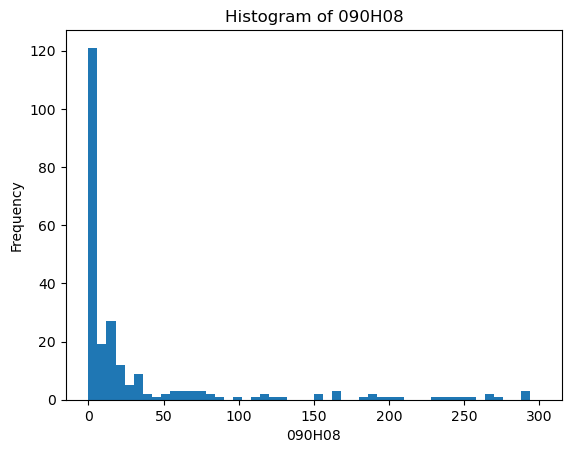

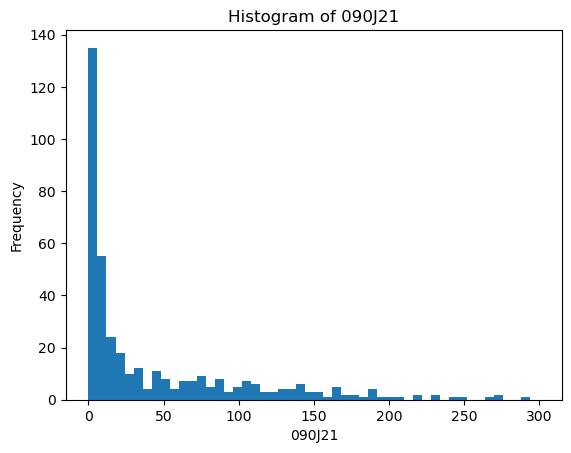

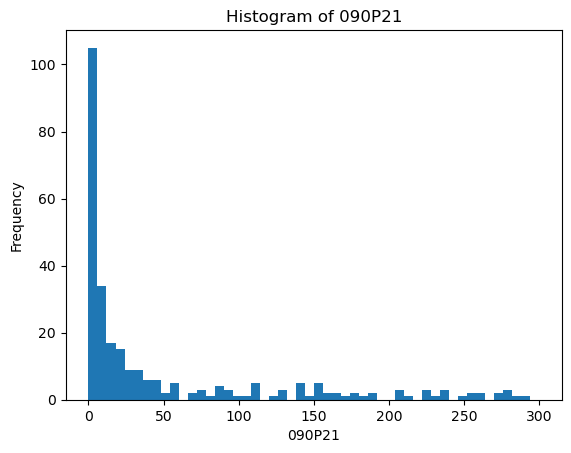

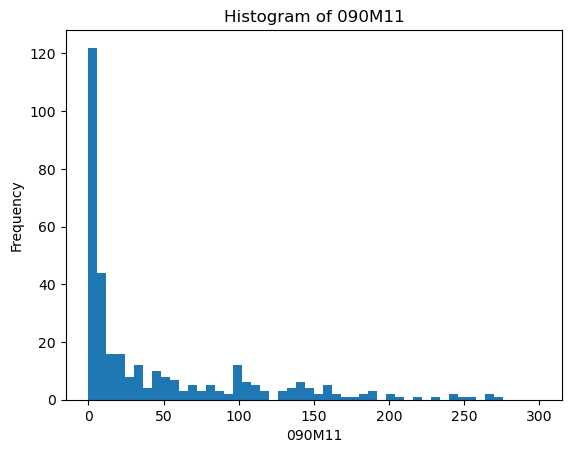

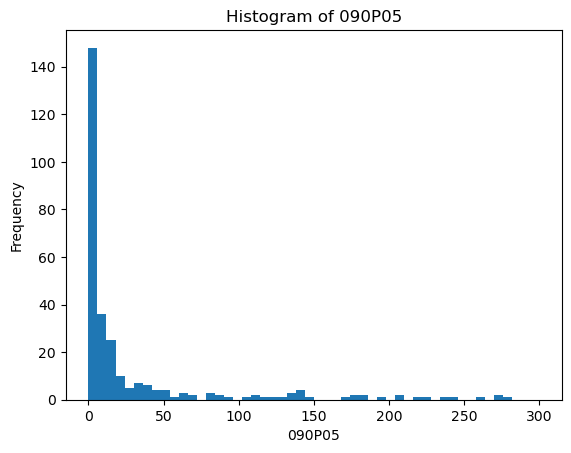

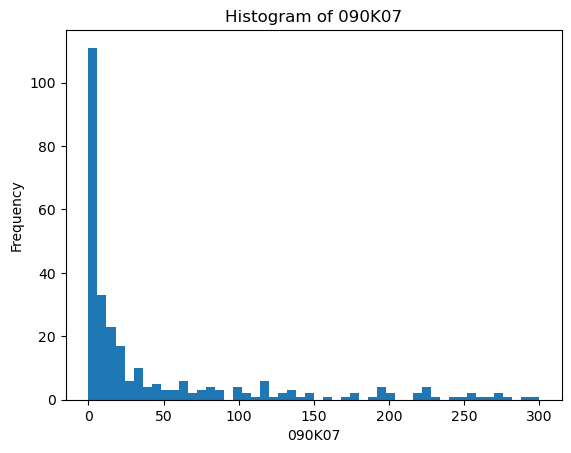

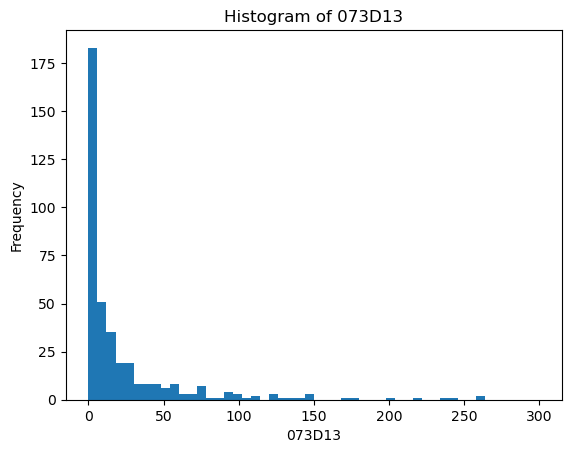

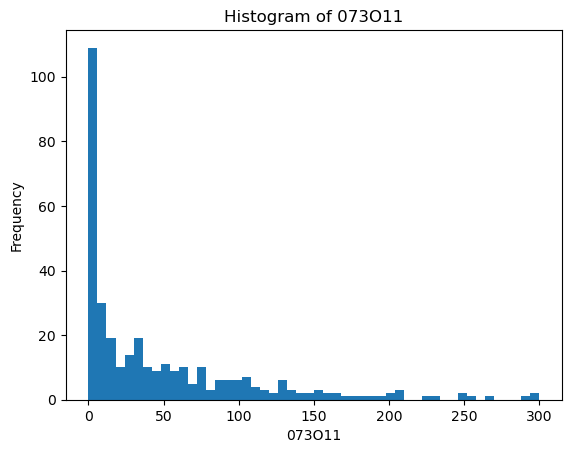

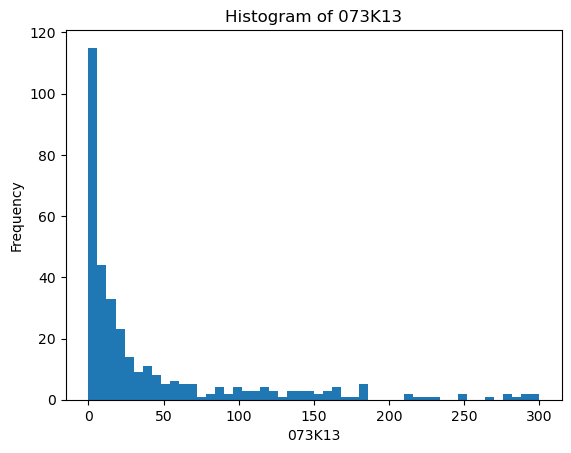

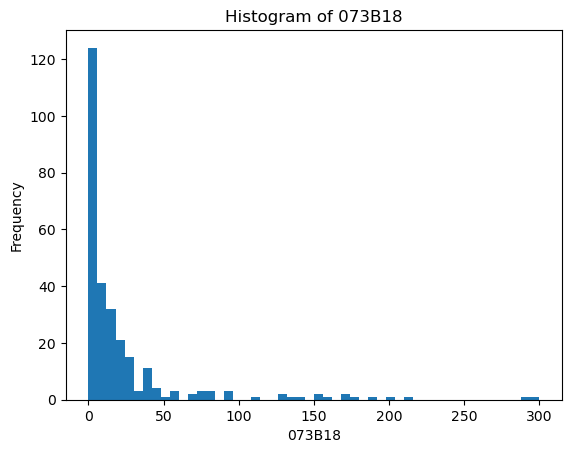

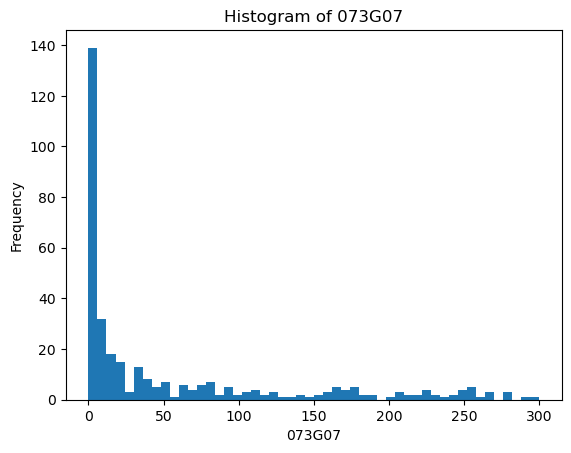

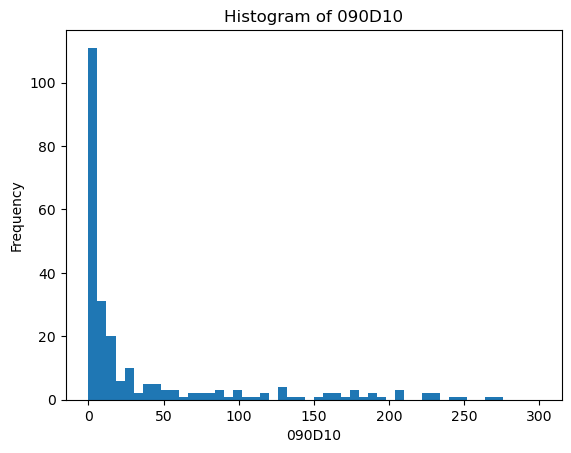

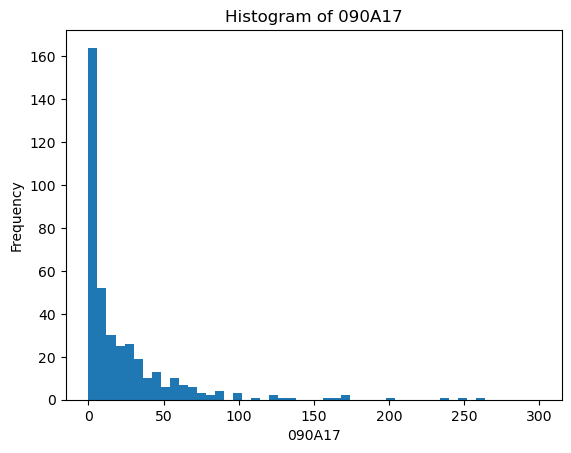

In [20]:
for column in dfRandzeros.columns:
    plt.hist(dfRandzeros[column], bins=50, range=(0, 300))  # Adjust bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

array([[<Axes: title={'center': '090H08'}>,
        <Axes: title={'center': '090J21'}>,
        <Axes: title={'center': '090P21'}>,
        <Axes: title={'center': '090M11'}>],
       [<Axes: title={'center': '090P05'}>,
        <Axes: title={'center': '090K07'}>,
        <Axes: title={'center': '073D13'}>,
        <Axes: title={'center': '073O11'}>],
       [<Axes: title={'center': '073K13'}>,
        <Axes: title={'center': '073B18'}>,
        <Axes: title={'center': '073G07'}>,
        <Axes: title={'center': '090D10'}>],
       [<Axes: title={'center': '090A17'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

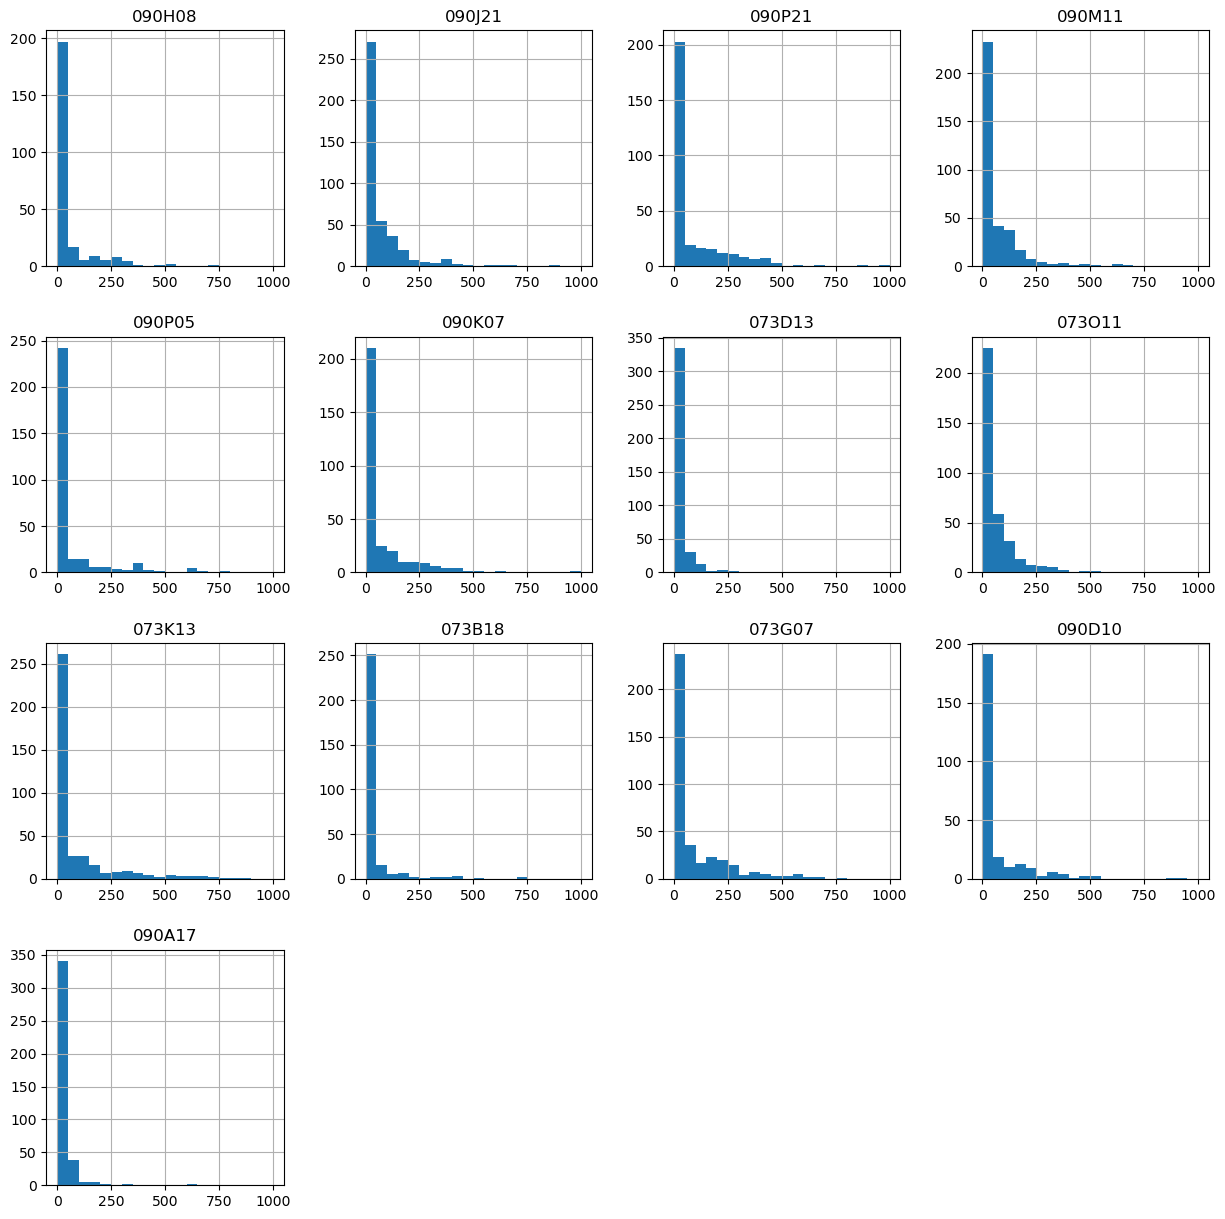

In [24]:
dfRandzeros.hist(bins = 20, range = (0, 1000), figsize=(15, 15))

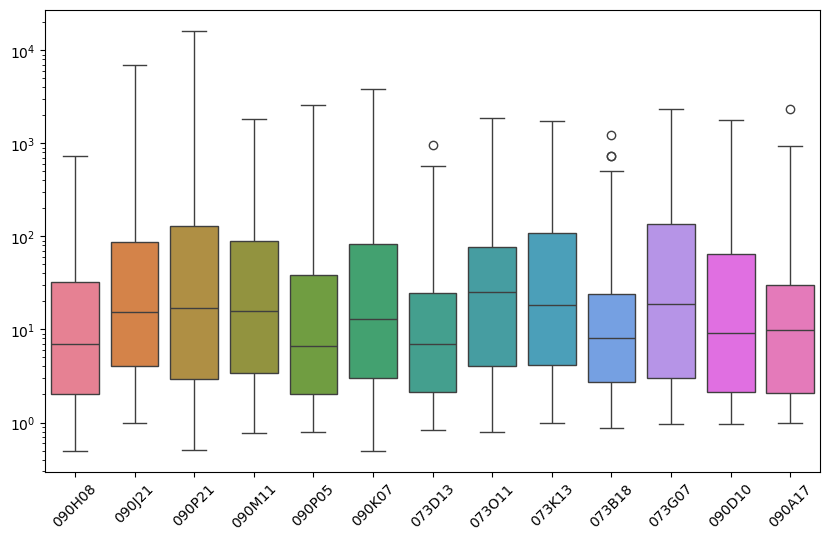

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfRandzeros, log_scale = True)
plt.xticks(rotation=45)
plt.show()

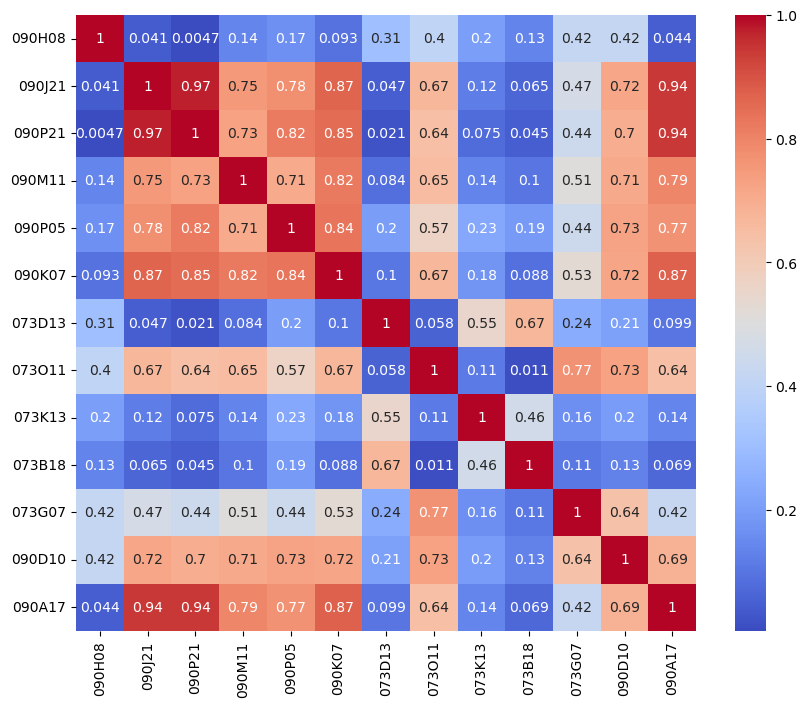

In [27]:
corr_matrix = dfRandzeros.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# TODO How can I extract the cells that have the highest correlation with each other?

# Dimensionality Reduction

## PCA

In [127]:
scaler = StandardScaler() # instance of the standardscaler class
scaled_data = scaler.fit_transform(ctMatrix.T)

# Performing 
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

,PC1,PC2
0,-0.455124,-11.112511
1,21.452682,8.564310
2,7.165456,19.618905
3,-19.953244,14.042637
4,-13.935273,-4.927647


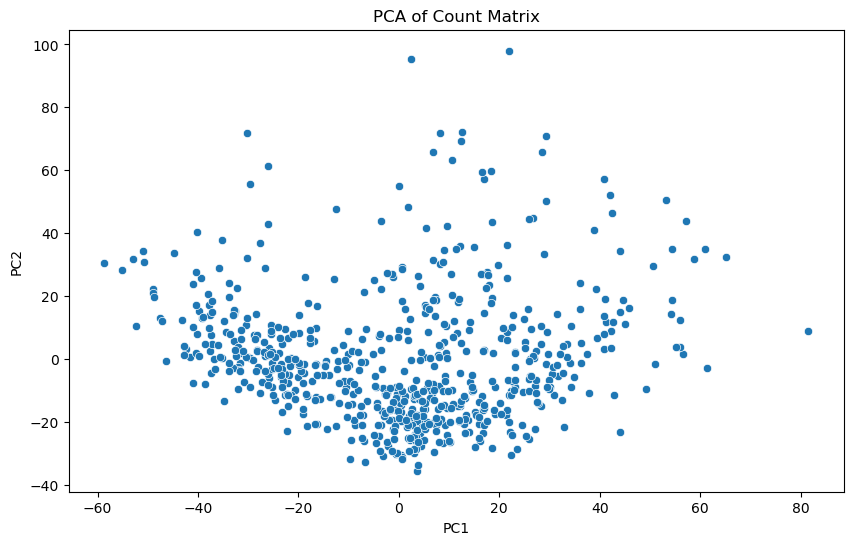

In [129]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Count Matrix')
plt.show()

In [38]:
scaled_data

array([[-0.22878565,  0.        , -0.5465241 , ...,  0.        ,
        -0.32924581,  0.25801486],
       [-0.22878565,  0.        , -0.49854208, ...,  0.        ,
        -0.32924581,  0.5884197 ],
       [-0.22878565,  0.        , -0.5475355 , ...,  0.        ,
        -0.32924581, -0.34863506],
       ...,
       [-0.22878565,  0.        ,  1.46440306, ...,  0.        ,
         3.38682869,  0.8634545 ],
       [-0.19254066,  0.        , -0.4934633 , ...,  0.        ,
         1.54975094, -0.34863506],
       [-0.22878565,  0.        , -0.56928619, ...,  0.        ,
        -0.32924581, -0.34863506]])

## K Means clustering

In [137]:
kmeans = KMeans()

#Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ctMatrix_clean)

# Perform PCA
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)

#Create a DF of scaled result
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])



In [146]:
#Performing the clustering
kmeans = KMeans(n_clusters = 3, random_state=1)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to PCA Dataframe
pca_df['cluster'] = clusters

/home/jon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0e957bda80>
Traceback (most recent call last):
  File "/home/jon/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jon/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jon/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0e96658540>
Traceback (most recent call last):
  File "/home/jon/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/jon/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jon/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/jon/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split

In [148]:
pca_df['cluster'].value_counts()

cluster
0    29135
1        4
2        2
Name: count, dtype: int64

In [136]:
scaled_data

array([[-0.03445359, -0.04381222, -0.03511998, ..., -0.04128182,
        -0.03131499, -0.03089612],
       [-0.02884146, -0.03199255, -0.03253594, ...,  0.20138295,
        -0.02560111, -0.030066  ],
       [-0.03263913, -0.04381222, -0.03511998, ..., -0.03869641,
        -0.02885062, -0.02758227],
       ...,
       [-0.03445359, -0.04381222, -0.03511998, ..., -0.04128182,
        -0.03213454, -0.03089612],
       [-0.03445359, -0.04381222, -0.03511998, ...,  0.41436001,
         0.1141472 , -0.03089612],
       [-0.0308156 , -0.03893474, -0.03511998, ..., -0.03611099,
        -0.03213454, -0.03089612]])

# Cleaning Data

## Duplicates

In [81]:

ctMatrix['zero'] = 0 
ctMatrix['zero1'] = 0 
ctMatrix = ctMatrix.rename(columns={'zero1':"zero"})

In [82]:
ctMatrix.shape

(40605, 659)

In [83]:
ctMatrix = ctMatrix.loc[:,~ctMatrix.columns.duplicated(keep=False)]

In [84]:
ctMatrix.shape

(40605, 657)

# Cleaning Data

### Dealing with duplicates

In [90]:
#Identifying any duplicate columns or rows
ctMatrix.index[ctMatrix.index.duplicated()]
ctMatrix.columns[ctMatrix.columns.duplicated()]
#Removing duplicates
#ctMatrix = ctMatrix.loc[:,~ctMatrix.columns.duplicated(keep=False)]

Index([], dtype='object')

## Dealing with sparcity

In [157]:
#Generating NA's
ctMatrix_zeros = ctMatrix.replace(0, value = np.nan, inplace=False)

In [158]:
ctMatrix.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 40605 entries, TSPAN6 to ADIPINT
Columns: 656 entries, 073A01 to 090P23
dtypes: float64(656)
memory usage: 203.5+ MB


In [159]:
ctMatrix_zeros.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 40605 entries, TSPAN6 to ADIPINT
Columns: 656 entries, 073A01 to 090P23
dtypes: float64(656)
memory usage: 203.5+ MB


In [160]:
ctMatrix_zeros.isna().any().sum()

656

<Axes: >

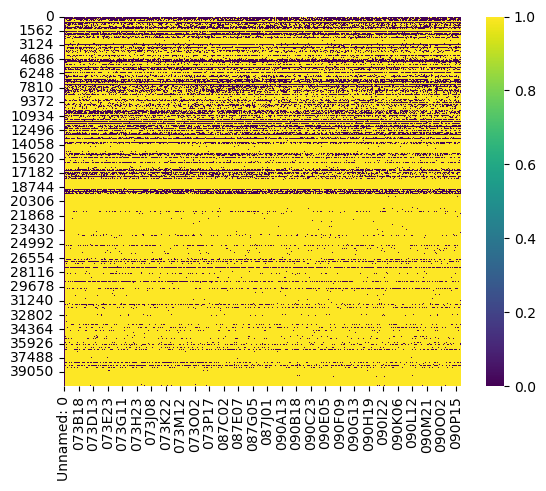

In [102]:
sns.heatmap(ctMatrix_zeros.isna(), cmap='viridis')

# Sparsity of Data

In [133]:
(ctMatrix==0).sum()

073A01    32427
073A02    33014
073A03    32996
073A04    32758
073A06    32841
          ...  
090P19    34040
090P20    32413
090P21    33702
090P22    32880
090P23    33945
Length: 656, dtype: int64

In [134]:
ctMatrix.size

26636880

In [119]:
# sums all the 0s in each column, then all the 0's in all columns
# Divided
(ctMatrix == 0).sum().sum() / ctMatrix.size

0.8275759773667186

In [120]:
col_names = ctMatrix.columns
index_names = ctMatrix.index

In [125]:
col_names[0:5]

Index(['073A01', '073A02', '073A03', '073A04', '073A06'], dtype='object')

In [126]:
index_names[0:5]

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112'], dtype='object')

### Removing highly sparse columns

In [135]:
ctMatrix.shape

(40605, 656)

In [152]:
#boolean dataframe
# mean is true + true + false = 1 + 1 + 0 = 3
# divided 2/3 ~= 33%
(ctMatrix == 0).mean()


073A01    0.798596
073A02    0.813053
073A03    0.812609
073A04    0.806748
073A06    0.808792
            ...   
090P19    0.838320
090P20    0.798251
090P21    0.829996
090P22    0.809752
090P23    0.835981
Length: 656, dtype: float64

In [149]:
ctMatrix.loc[:, (ctMatrix == 0)]

ValueError: Cannot index with multidimensional key

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import sparse

# Sample DataFrame with sparse data
df = pd.DataFrame({
    'A': [0, 2, 0, 4],
    'B': [0, 0, 7, 8],
    'C': [0, 10, 0, 0]
})

# Calculate sparsity
sparsity = (df == 0).sum().sum() / df.size
print(f"Sparsity: {sparsity:.2f}")

# Remove columns with more than 50% zeros
threshold = 0.5
df = df.loc[:, (df == 0).mean() < threshold]

# Fill missing values (zeros) with the mean of each column
df.replace(0, np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Perform PCA on the data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# Convert DataFrame to sparse format
sparse_df = df.astype(pd.SparseDtype("float", np.nan))

# Convert DataFrame to a sparse matrix
sparse_matrix = sparse.csr_matrix(df.fillna(0).values)

print("Sparse DataFrame:\n", sparse_df)
print("Reduced Data after PCA:\n", reduced_data)
print("Sparse Matrix:\n", sparse_matrix)

# Testing in small dataset

In [128]:
data = {
    'A': [0, 1, 2, 3, 4],
    'B': [5, 6, 7, 8, 9],
    'C': [10, 11, 12, 13, 14],
    'D': [15, 16, 17, 18, 19]
}

df = pd.DataFrame(data)

In [130]:
df.loc[:, ['A','B']]

,A,B
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9
